In [11]:
# import surv_bart_pkg as sbp
from surv_bart_pkg import utillities as ut
from surv_bart_pkg import surv_bart as bmb

import numpy as np
import pandas as pd
import lifelines as ll


In [12]:
# generage the random number generator object
rng = np.random.default_rng(seed=99)

In [163]:
N = 100
X_VARS = 1
VAR_CLASS = [2]
VAR_PROB = [0.5]
LAMBDA = "np.exp(-4 + .69*x_mat[:,0])" 
ALPHA_F = "1"
eos = 30
time_scale=20


# get SV
x_mat = ut.get_x_matrix(N=N, x_vars=X_VARS, VAR_CLASS=VAR_CLASS, VAR_PROB=VAR_PROB, rng=rng)
t_event, status, x_mat, true, true_scale = ut.sim_surv(x_mat, LAMBDA, ALPHA_F, eos, time_scale=time_scale, return_full=True, rng = rng)

In [180]:
N = 100
X_VARS = 1
VAR_CLASS = [2]
VAR_PROB = [0.5]
LAMBDA = "np.exp(-7 + .69*x_mat[:,0])" 
ALPHA_F = "1"
eos = 30
time_scale=20


# get SV
x_mat2 = ut.get_x_matrix(N=N, x_vars=X_VARS, VAR_CLASS=VAR_CLASS, VAR_PROB=VAR_PROB, rng=rng)
t_event2, status2, x_mat2, true2, true_scale2 = ut.sim_surv(x_mat, LAMBDA, ALPHA_F, eos, time_scale=time_scale, return_full=True, rng = rng)

In [167]:

# ut.quick_kpm_plot(x_mat, )
msk = (x_mat == 1).reshape(-1)
hr = (true["hz_true"][msk,:].mean(0)/true["hz_true"][~msk,:].mean(0))[0]
hr

1.9937155332430836

In [181]:
msk2 = (x_mat2 == 1).reshape(-1)
hr2 = (true2["hz_true"][msk2,:].mean(0)/true2["hz_true"][~msk2,:].mean(0))[0]
hr

1.9937155332430836

In [95]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Time')

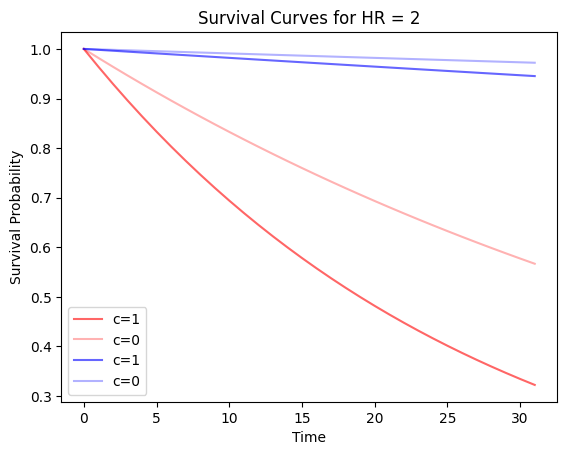

In [183]:
# ut.quick_kpm_true(x_mat, status, t_event, true, true_scale)
plt.plot(true["t"], true["sv_true"][msk][0,:], color = "red", alpha=.6, label = "c=1")
plt.plot(true["t"], true["sv_true"][~msk][0,:], color = "red", alpha=0.3, label="c=0")
plt.plot(true2["t"], true2["sv_true"][msk2][0,:], color = "blue", alpha=0.6, label= "c=1")
plt.plot(true2["t"], true2["sv_true"][~msk2][0,:], color = "blue", alpha=0.3, label= "c=0")

plt.legend()
plt.title("Survival Curves for HR = 2")
plt.ylabel("Survival Probability")
plt.xlabel("Time")

In [148]:
np.exp(.2)
np.log(2)

0.6931471805599453